In [1]:
# %load_ext autoreload
# %autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys
sys.path.append('../')


# import math
# import argparse
# import h5py
import importlib
# import numpy as np
# import torch
import time
import sys
# from torch.utils.data import DataLoader
# from torch.nn.utils import clip_grad_norm_
# from tqdm import tqdm
import pickle

# from models.vae_flow import *
# from models.flow import add_spectral_norm, spectral_norm_power_iteration
# from models.shower_flow import compile_HybridTanH_model
# from configs import Configs
# from utils.plotting import get_projections, get_plots, MAP, offset, layer_bottom_pos, cell_thickness, Xmax, Xmin, Zmax, Zmin
# import utils.gen_utils as gen_utils


# import k_diffusion as K


# cfg = Configs()

# print(cfg.__dict__)


# from utils.plotting import get_projections, get_plots, MAP, offset, layer_bottom_pos, cell_thickness, plt_cog
# from utils.plotting import cfg as cfg_plt
import utils.plotting as plotting
importlib.reload(plotting)

import numpy as np
# import h5py
# import matplotlib.pyplot as plt

/tmp/ipykernel_121969/2170841146.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


100%|██████████| 30/30 [00:00<00:00, 180.24it/s]


In [2]:
real_label = r'\textsc{Geant4}'
ddpm_label = r'\textsc{CaloClouds}'
edm_label = r'\textsc{CaloClouds II}'
cm_label = r'\textsc{CaloClouds II (CM)}'

# load pickled dicts

In [3]:
pickle_path = '/beegfs/desy/user/buhmae/6_PointCloudDiffusion/output/singleE/pickle/'
min_energy_list = [10, 50, 90]
max_energy_list = [10, 50, 90]

dict_list = []
real_list_list = []
fakes_list_list = []
for j in range(len(min_energy_list)):
    min_energy = min_energy_list[j]
    max_energy = max_energy_list[j]
    with open(pickle_path+'dict_{}-{}GeV.pickle'.format(str(min_energy), str(max_energy)), 'rb') as f:
        dict = pickle.load(f)
    dict_list.append(dict)
    real_list_list.append(dict['real_list'])
    fakes_list_list.append(dict['fakes_list'])
    
print('dicts loaded')
print(dict_list[0].keys())

dicts loaded
dict_keys(['real_list', 'fakes_list', 'c_cog_real', 'c_cog_fake'])


In [4]:
# mean occ of 50 GeV CM model
fakes_list_list[2][1][2].mean()

1161.3775

# Plotting

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 228.40it/s]


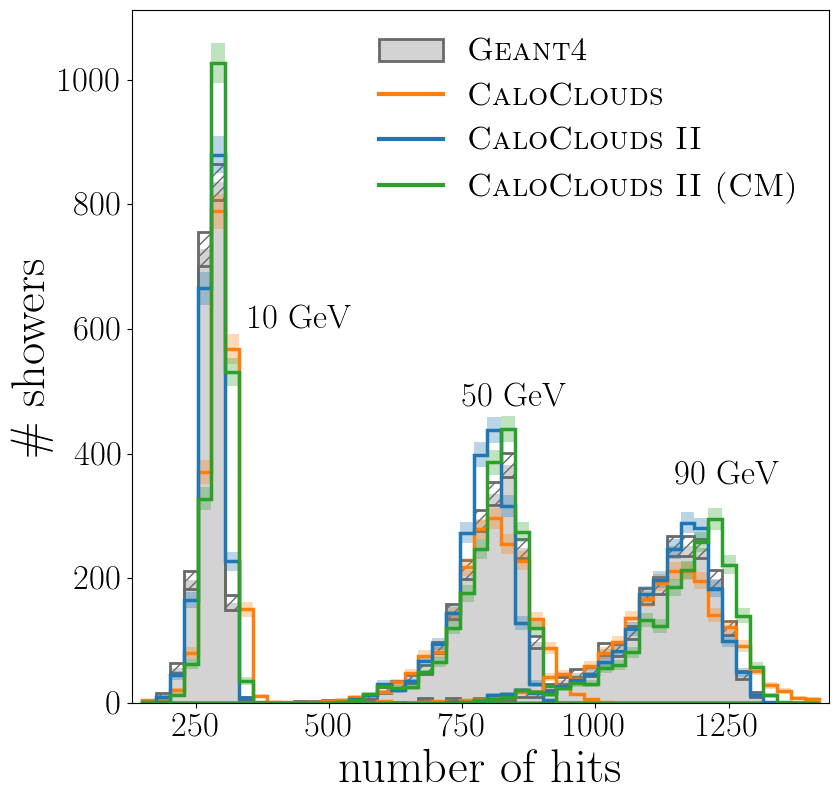

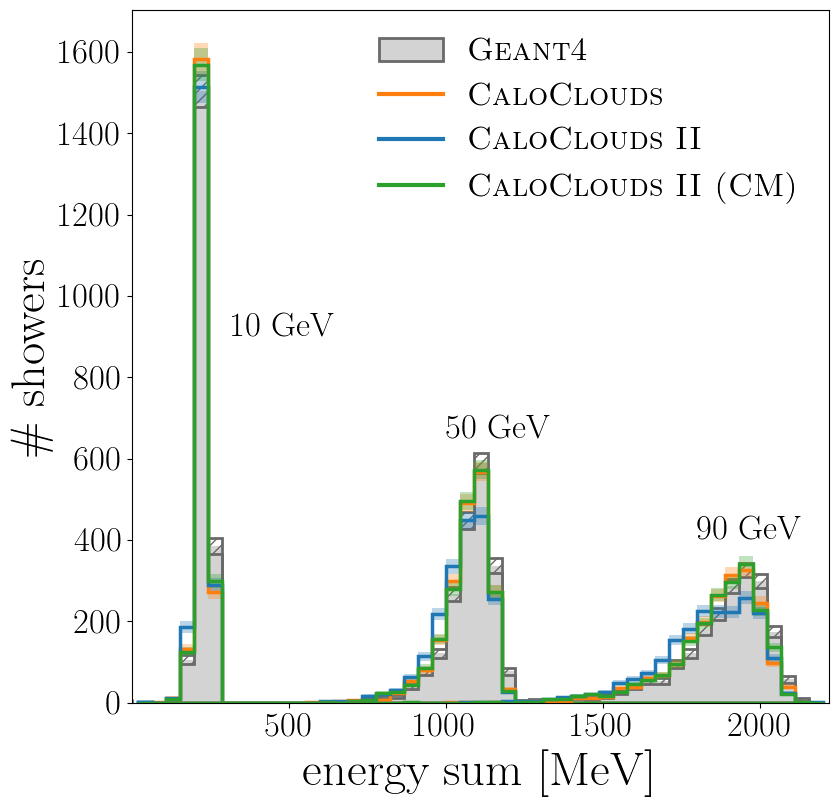

In [5]:
importlib.reload(plotting)

plotting.get_plots_from_observables_singleE(real_list_list, fakes_list_list, labels=[real_label, ddpm_label, edm_label, cm_label])